# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

# Read the Data

Read the data into a pandas Dataframe. More info [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html).

In [2]:
df = pd.read_csv("../data/CHRIS-ICE_CC1.csv")

After importing the data to a Pandas Dataframe, we check the first and last columns of our dataset.

In [3]:
df.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,2019-03-18,2199.0,2224.0,2172.0,2196.0,-1.0,2191.0,12623.0,100994.0,605.0,10.0,NaN
1,2019-03-15,2215.0,2224.0,2179.0,2197.0,-17.0,2200.0,13343.0,99575.0,114.0,NaN,NaN
2,2019-03-14,2215.0,2266.0,2207.0,2214.0,-2.0,2232.0,14775.0,100053.0,177.0,NaN,NaN
3,2019-03-13,2314.0,2314.0,2314.0,2203.0,-1.0,2314.0,1.0,1.0,NaN,NaN,NaN
4,2019-03-12,NaN,NaN,NaN,2204.0,15.0,NaN,NaN,1.0,NaN,NaN,NaN


In [4]:
df.tail()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
12543,1968-10-07,3525.0,3532.0,3525.0,3532.0,NaN,NaN,34.0,89.0,NaN,NaN,NaN
12544,1968-10-04,3440.0,3440.0,3440.0,3440.0,NaN,NaN,34.0,58.0,NaN,NaN,NaN
12545,1968-10-03,3395.0,3440.0,3395.0,3440.0,NaN,NaN,17.0,47.0,NaN,NaN,NaN
12546,1968-10-02,3388.0,3405.0,3375.0,3375.0,NaN,NaN,49.0,20.0,NaN,NaN,NaN
12547,1968-10-01,3425.0,3430.0,3425.0,3425.0,NaN,NaN,28.0,0.0,NaN,NaN,NaN


And now we check the dimensions of our dataset.

In [6]:
df.shape

(12548, 12)

The dataset is composed 

# Visualizing the Settle Price

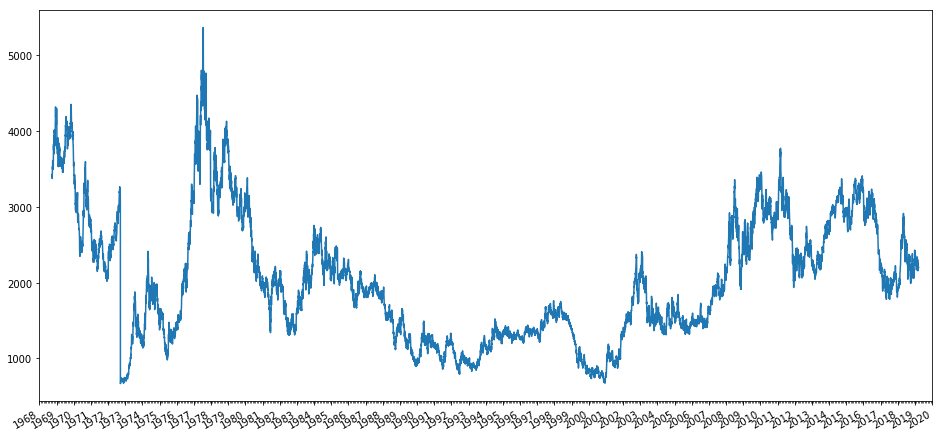

In [46]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(list(df.iloc[::-1, :]["Date"].astype("datetime64[D]")), list(df.iloc[::-1, :]["Settle"]))

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df["Date"].iloc[-1], 'Y')
datemax = np.datetime64(df["Date"].iloc[0], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

fig.autofmt_xdate()

plt.show()

## Timeindexing

In [47]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.index

DatetimeIndex(['2019-03-18', '2019-03-15', '2019-03-14', '2019-03-13',
               '2019-03-12', '2019-03-11', '2019-03-08', '2019-03-07',
               '2019-03-06', '2019-03-05',
               ...
               '1968-10-14', '1968-10-11', '1968-10-10', '1968-10-09',
               '1968-10-08', '1968-10-07', '1968-10-04', '1968-10-03',
               '1968-10-02', '1968-10-01'],
              dtype='datetime64[ns]', name='Date', length=12548, freq=None)

In [113]:
settle_price = df.iloc[::-1, :]["Settle"]

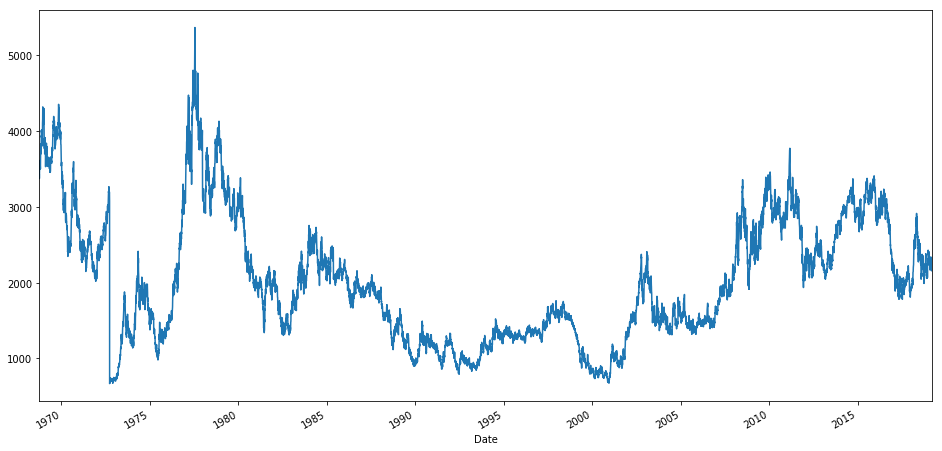

In [49]:
plt.figure(figsize=(16,8))
settle_price.plot()

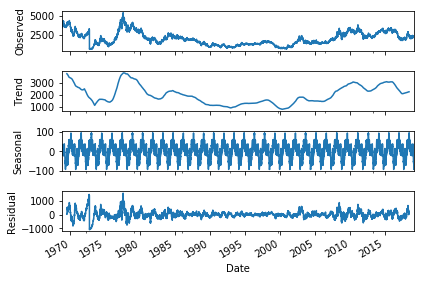

In [61]:
decomposition = sm.tsa.seasonal_decompose(settle_price, model="additive", freq=365)
fig = decomposition.plot()
plt.show()

In [52]:
settle_price.index

DatetimeIndex(['1968-10-01', '1968-10-02', '1968-10-03', '1968-10-04',
               '1968-10-07', '1968-10-08', '1968-10-09', '1968-10-10',
               '1968-10-11', '1968-10-14',
               ...
               '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18'],
              dtype='datetime64[ns]', name='Date', length=12548, freq=None)

In [74]:
df[df["2010"]]["mean_yearly_settle"] = df["2010"]["Settle"].mean()
df

ValueError: Must pass DataFrame with boolean values only

In [82]:
df.index

DatetimeIndex(['2019-03-18', '2019-03-15', '2019-03-14', '2019-03-13',
               '2019-03-12', '2019-03-11', '2019-03-08', '2019-03-07',
               '2019-03-06', '2019-03-05',
               ...
               '1968-10-14', '1968-10-11', '1968-10-10', '1968-10-09',
               '1968-10-08', '1968-10-07', '1968-10-04', '1968-10-03',
               '1968-10-02', '1968-10-01'],
              dtype='datetime64[ns]', name='Date', length=12548, freq=None)

In [102]:
for year in range(1968, 2020):
    df.loc[str(year), "yearly_settle_mean"] = df.loc[str(year), "Settle"].mean()

In [103]:
df

,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume,yearly_settle_mean
Date,,,,,,,,,,,,
2019-03-18,2199.0,2224.0,2172.0,2196.0,-1.0,2191.0,12623.0,100994.0,605.0,10.0,NaN,2259.480769
2019-03-15,2215.0,2224.0,2179.0,2197.0,-17.0,2200.0,13343.0,99575.0,114.0,NaN,NaN,2259.480769
2019-03-14,2215.0,2266.0,2207.0,2214.0,-2.0,2232.0,14775.0,100053.0,177.0,NaN,NaN,2259.480769
2019-03-13,2314.0,2314.0,2314.0,2203.0,-1.0,2314.0,1.0,1.0,NaN,NaN,NaN,2259.480769
2019-03-12,NaN,NaN,NaN,2204.0,15.0,NaN,NaN,1.0,NaN,NaN,NaN,2259.480769
2019-03-11,2199.0,2199.0,2199.0,2189.0,-10.0,2199.0,2.0,2.0,NaN,NaN,NaN,2259.480769
2019-03-08,2257.0,2257.0,1901.0,2199.0,16.0,2174.0,6.0,274.0,NaN,NaN,NaN,2259.480769
2019-03-07,NaN,NaN,NaN,2183.0,-63.0,NaN,NaN,274.0,NaN,NaN,NaN,2259.480769
2019-03-06,NaN,NaN,NaN,2246.0,88.0,NaN,NaN,278.0,NaN,NaN,NaN,2259.480769


In [112]:
yearly_means = df.iloc[::-1, :]["yearly_settle_mean"]

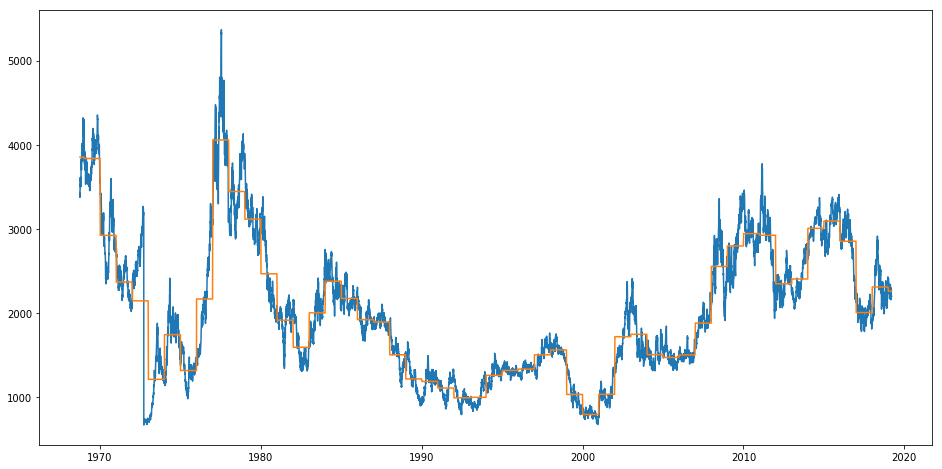

In [115]:
plt.figure(figsize=(16,8))
plt.plot(settle_price)
plt.plot(yearly_means)
plt.show()

# Moving Average on Log

In [122]:
settle_log = np.log(settle_price)

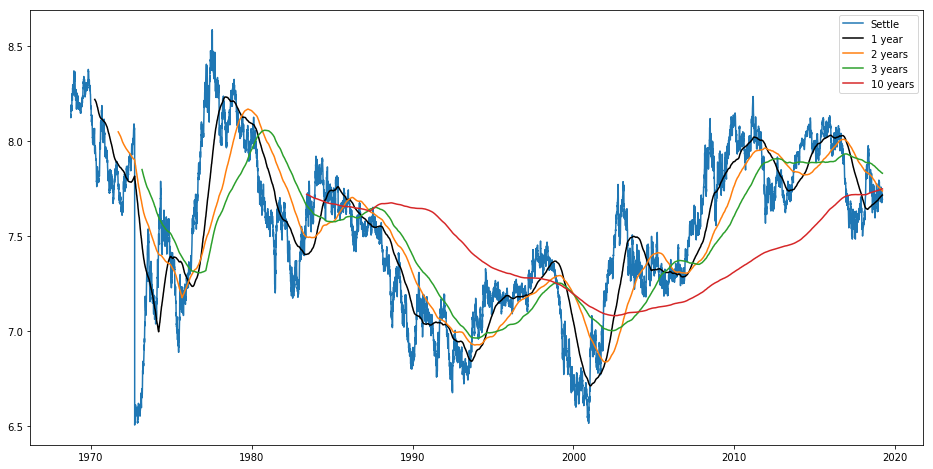

In [157]:
moving_avg_1 = settle_log.rolling(1*365).mean()
moving_avg_2 = settle_log.rolling(2*365).mean()
moving_avg_3 = settle_log.rolling(3*365).mean()
moving_avg_10 = settle_log.rolling(10*365).mean()
plt.figure(figsize=(16, 8))
plt.plot(settle_log)
plt.plot(moving_avg_1, color="k", label="1 year")
plt.plot(moving_avg_2, label="2 years")
plt.plot(moving_avg_3, label="3 years")
plt.plot(moving_avg_10, label="10 years")
plt.legend()
plt.show()

## Subtract Moving Avg from the Original Value

In [136]:
ts_log_moving_avg_diff = settle_log - moving_avg
ts_log_moving_avg_diff

Date
1968-10-01         NaN
1968-10-02         NaN
1968-10-03         NaN
1968-10-04         NaN
1968-10-07         NaN
1968-10-08         NaN
1968-10-09         NaN
1968-10-10         NaN
1968-10-11         NaN
1968-10-14         NaN
1968-10-15         NaN
1968-10-16         NaN
1968-10-17         NaN
1968-10-18         NaN
1968-10-21         NaN
1968-10-22         NaN
1968-10-23         NaN
1968-10-24         NaN
1968-10-25         NaN
1968-10-28         NaN
1968-10-29         NaN
1968-10-30         NaN
1968-10-31         NaN
1968-11-01         NaN
1968-11-04         NaN
1968-11-06         NaN
1968-11-07         NaN
1968-11-08         NaN
1968-11-12         NaN
1968-11-13         NaN
                ...   
2019-02-04    0.001269
2019-02-05   -0.003169
2019-02-06    0.013427
2019-02-07   -0.002919
2019-02-08   -0.014526
2019-02-11   -0.002218
2019-02-12   -0.001212
2019-02-13    0.007836
2019-02-14    0.000374
2019-02-15    0.032997
2019-02-19    0.046706
2019-02-20    0.028137
2019-0

# Test Stationarity Function

In [190]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(365).mean()
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(365).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16,8))
    orig = plt.plot(timeseries, color='C0',label='Original')
    mean = plt.plot(rolmean, color='C3', label='Rolling Mean')
    std = plt.plot(rolstd, color='C2', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Test Stationarity

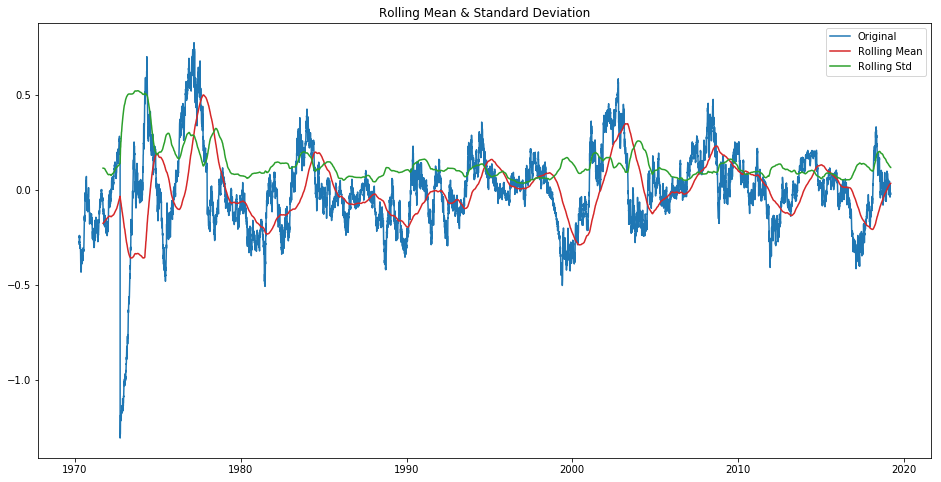

Results of Dickey-Fuller Test:
Test Statistic                -6.290690e+00
p-value                        3.605529e-08
#Lags Used                     1.000000e+00
Number of Observations Used    1.218200e+04
Critical Value (1%)           -3.430887e+00
Critical Value (5%)           -2.861777e+00
Critical Value (10%)          -2.566896e+00
dtype: float64


In [150]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

# Weighted Average

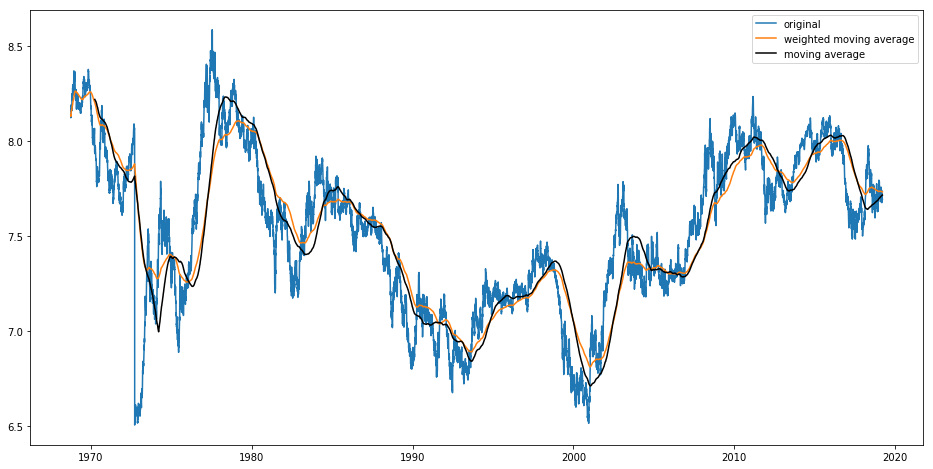

In [174]:
expweighted_avg = settle_log.ewm(halflife=182).mean()
plt.figure(figsize=(16, 8))
plt.plot(settle_log, label="original")
plt.plot(expweighted_avg, label="weighted moving average")
plt.plot(moving_avg_1, color="k", label="moving average")
plt.legend()
plt.show()

# Subtract the Weighted Average from Log

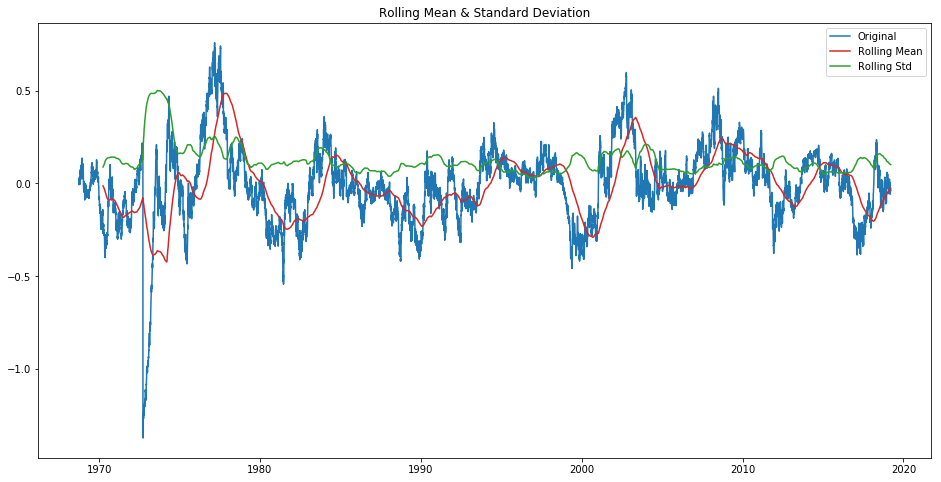

Results of Dickey-Fuller Test:
Test Statistic                -6.445466e+00
p-value                        1.569901e-08
#Lags Used                     1.000000e+00
Number of Observations Used    1.254600e+04
Critical Value (1%)           -3.430871e+00
Critical Value (5%)           -2.861770e+00
Critical Value (10%)          -2.566893e+00
dtype: float64


In [175]:
ts_log_ewma_diff = settle_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

# Removing Trend with Shift

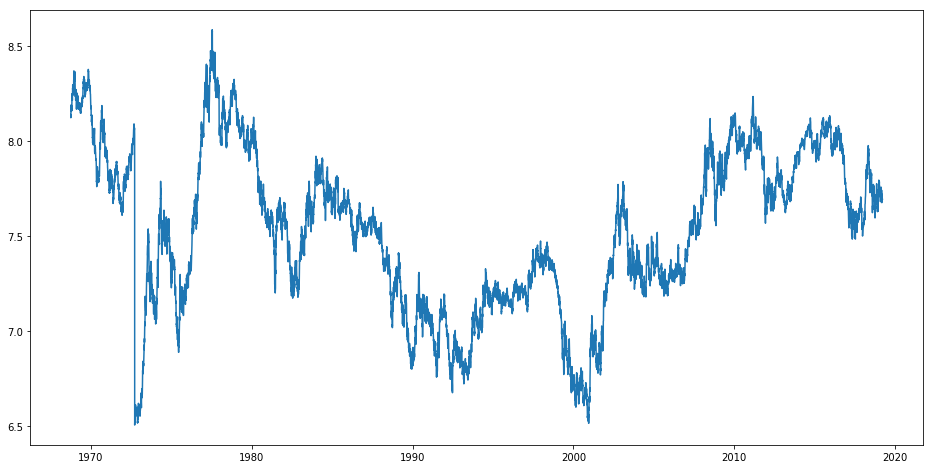

In [182]:
plt.figure(figsize=(16,8))
plt.plot(settle_log)

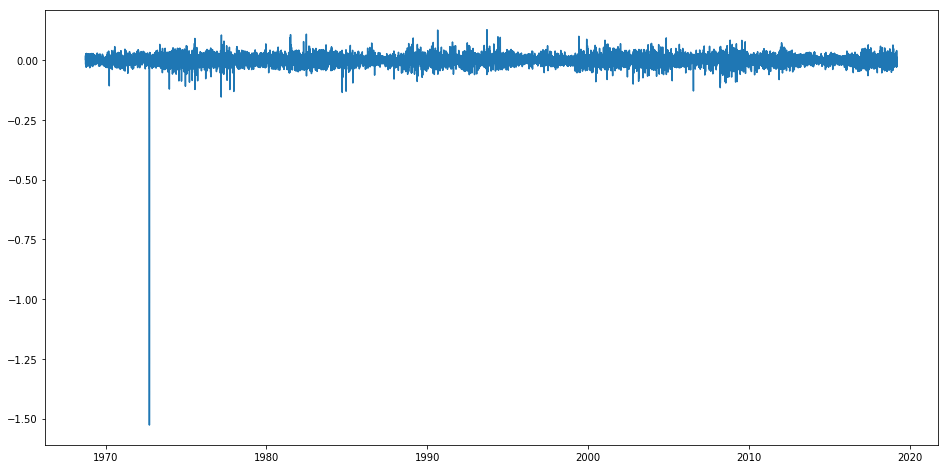

In [181]:
ts_log_diff = settle_log - settle_log.shift()
plt.figure(figsize=(16,8))
plt.plot(ts_log_diff)

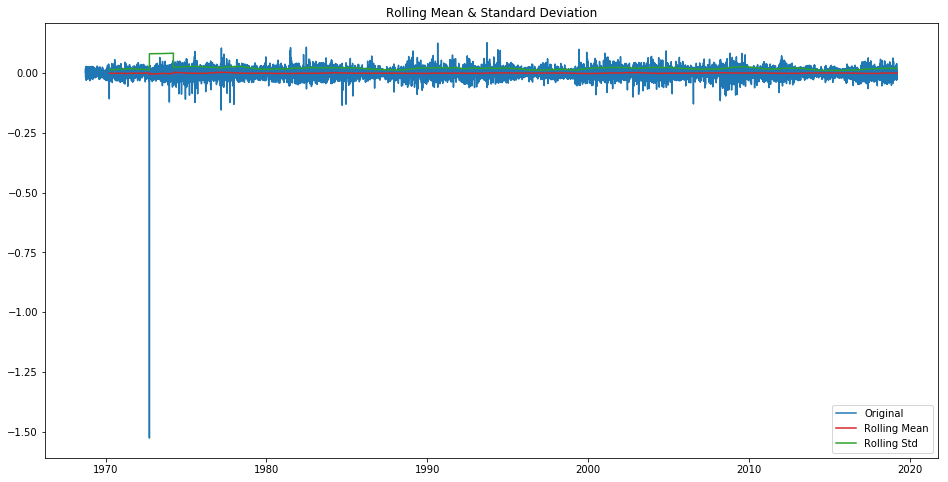

Results of Dickey-Fuller Test:
Test Statistic                  -110.433216
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    12546.000000
Critical Value (1%)               -3.430871
Critical Value (5%)               -2.861770
Critical Value (10%)              -2.566893
dtype: float64


In [183]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decompostion

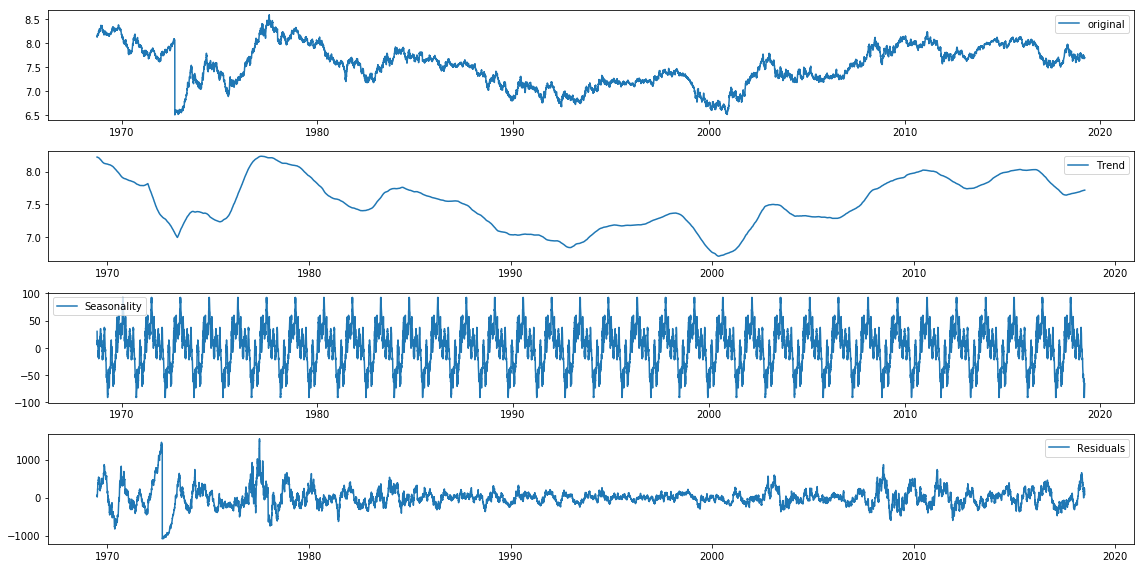

In [189]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(settle_log, freq=365)

trend = decompostion.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(settle_log, label="original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

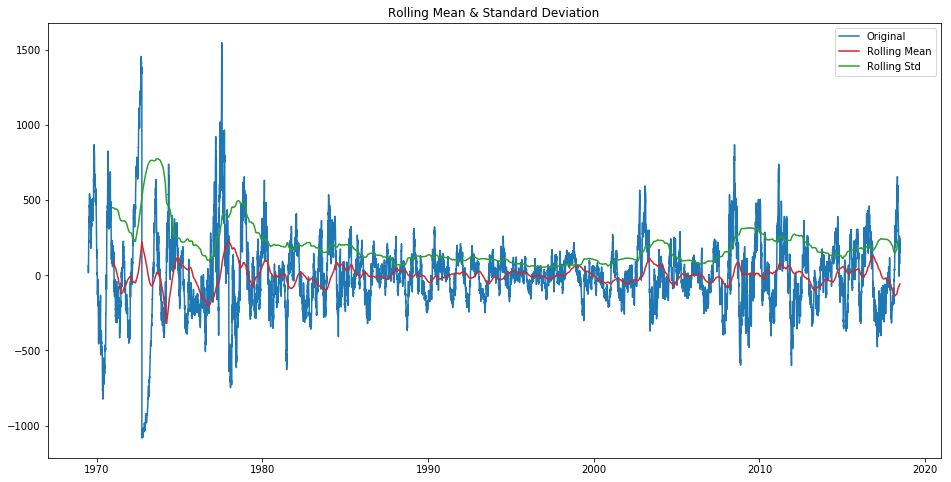

Results of Dickey-Fuller Test:
Test Statistic                -1.072715e+01
p-value                        3.044728e-19
#Lags Used                     1.900000e+01
Number of Observations Used    1.216400e+04
Critical Value (1%)           -3.430888e+00
Critical Value (5%)           -2.861778e+00
Critical Value (10%)          -2.566896e+00
dtype: float64


In [191]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)